In [51]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

%matplotlib inline

In [52]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [53]:
img_array = np.load('/content/gdrive/My Drive/pgp/cnn-classify/images.npy')

In [54]:
img_array.shape

(4750, 128, 128, 3)

In [55]:
labels=pd.read_csv(('/content/gdrive/My Drive/pgp/cnn-classify/Labels.csv'))

In [56]:
labels.shape

(4750, 1)

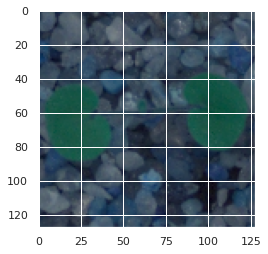

In [57]:
# Visualize the first image
plt.imshow(img_array[0], cmap='gray')

In [58]:
# What are the different classes and their values
labels.value_counts()

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
dtype: int64

In [59]:
# Normalization
img_array_normal = img_array/255

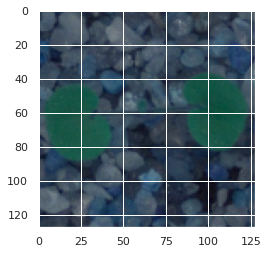

In [60]:
plt.imshow(img_array_normal[0], cmap='gray')

In [61]:
# Gaussian blurring
from scipy.ndimage.filters import gaussian_filter
img_normal_blur = gaussian_filter(img_array_normal, sigma=3)

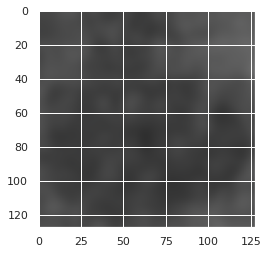

In [62]:
# Now look at the data
plt.imshow(img_normal_blur[0])

In [63]:
labels

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill
...,...
4745,Loose Silky-bent
4746,Loose Silky-bent
4747,Loose Silky-bent
4748,Loose Silky-bent


In [64]:
# Convert labels to one hot
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(labels['Label'])



In [65]:
print(y[0])
print ("Label for y[0] : %s\n" %(enc.classes_[y.argmax()]))

[0 0 0 0 0 0 0 0 0 0 1 0]
Label for y[0] : Small-flowered Cranesbill



In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(img_normal_blur, y, test_size=0.3, random_state=7)
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state=7)

In [67]:
X_train.shape

(3325, 128, 128, 3)

In [68]:
y_train.shape

(3325, 12)

In [69]:
print(y_train[0])
print("Label for y_train[0]: %s\n" %(enc.classes_[y_train.argmax()]))

[0 0 0 1 0 0 0 0 0 0 0 0]
Label for y_train[0]: Common Chickweed



In [70]:
X_val.shape

(713, 128, 128, 3)

In [71]:
y_val.shape

(713, 12)

In [72]:
X_test.shape

(712, 128, 128, 3)

In [73]:
y_test.shape

(712, 12)

Shape: There is no need to reshape this data as it is compatible for CNN

In [74]:
from tensorflow.keras.models import Sequential          # Sequential groups a linear stack of layers into a tf.keras.Model.
from tensorflow.keras.layers import Conv2D              # This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
from tensorflow.keras.layers import MaxPooling2D        # Max pooling operation for 2D spatial data.
from tensorflow.keras.layers import Flatten             # Flattens the input. Does not affect the batch size.
from tensorflow.keras.layers import Dense, Dropout      # Dropout: Applies Dropout to the input.
                                                        # Dense: Just your regular densely-connected NN layer.

In [75]:
# Initialising the CNN classifier
classifier = Sequential()

# Add a Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu', padding = 'same'))

# Add a Max Pooling layer of size 2X2
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))

# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Add another Convolution layer with 32 kernels of 3X3 shape with activation function ReLU
classifier.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'valid'))

# Adding another pooling layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening the layer before fully connected layers
classifier.add(Flatten())

# Adding a fully connected layer with 512 neurons
classifier.add(Dense(units = 512, activation = 'relu'))

# Adding dropout with probability 0.5
classifier.add(Dropout(0.5))


# Adding a fully connected layer with 128 neurons
classifier.add(Dense(units = 128, activation = 'relu'))


# The final output layer with 10 neurons to predict the categorical classifcation
classifier.add(Dense(units = 12, activation = 'softmax'))

In [76]:

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [77]:
# There are 3325 training images and 713 validation images in total
classifier.fit(X_train, y_train,
                       epochs = 50,
                         validation_data = (X_val, y_val))

Epoch 1/50
104/104 [==============================] - 64s 615ms/step - loss: 2.4340 - accuracy: 0.1359 - val_loss: 2.4260 - val_accuracy: 0.1332
Epoch 2/50
104/104 [==============================] - 63s 604ms/step - loss: 2.4165 - accuracy: 0.1420 - val_loss: 2.4086 - val_accuracy: 0.1332
Epoch 3/50
104/104 [==============================] - 68s 649ms/step - loss: 2.3340 - accuracy: 0.1762 - val_loss: 2.0110 - val_accuracy: 0.2861
Epoch 4/50
104/104 [==============================] - 63s 608ms/step - loss: 1.9156 - accuracy: 0.2899 - val_loss: 1.7022 - val_accuracy: 0.4053
Epoch 5/50
104/104 [==============================] - 63s 602ms/step - loss: 1.6847 - accuracy: 0.3910 - val_loss: 1.4074 - val_accuracy: 0.5189
Epoch 6/50
104/104 [==============================] - 64s 613ms/step - loss: 1.4717 - accuracy: 0.4770 - val_loss: 1.1336 - val_accuracy: 0.6241
Epoch 7/50
104/104 [==============================] - 63s 610ms/step - loss: 1.2849 - accuracy: 0.5386 - val_loss: 1.1051 - val_ac

In [78]:
score = classifier.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

23/23 [==============================] - 4s 156ms/step - loss: 0.0244 - accuracy: 0.9972
Test loss: 0.024358242750167847
Test accuracy: 0.9971910119056702


In [79]:
from sklearn.metrics import confusion_matrix
y_pred=classifier.predict(X_test)
# Convert one hot encoding to regular int
y_test_int = np.argmax(y_test, axis=1)
y_pred_int = np.argmax(y_pred, axis=1)

cm=confusion_matrix(y_test_int, y_pred_int)
print("Confusion matrix in text form")
cm

Confusion matrix in text form


array([[50,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 57,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 87,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 68,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 94,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 82,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 38,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 78,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 55]])

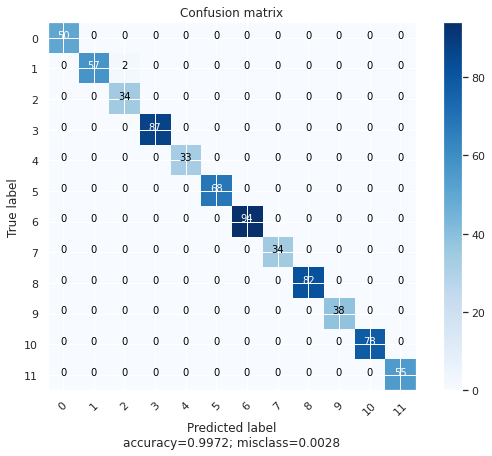

In [80]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
   

    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
  

plot_confusion_matrix(cm, target_names=range(12))

Prediction for test 2



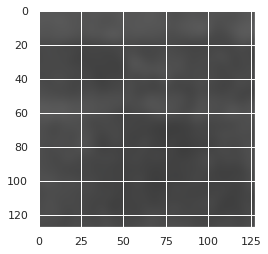

This is Sugar beet

Prediction for test 3



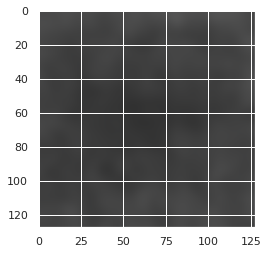

This is Cleavers

Prediction for test 33



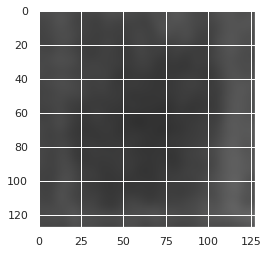

This is Cleavers

Prediction for test 36



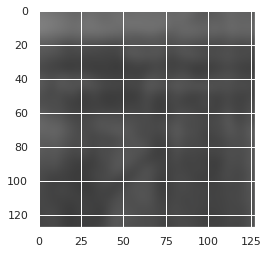

This is Black-grass

Prediction for test 59



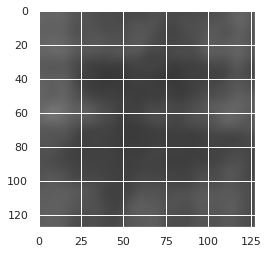

This is Maize



In [81]:
# Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59].
for i in [2, 3, 33, 36, 59]:
  print("Prediction for test %d\n" %(i))
  plt.imshow(X_test[i])
  plt.show()
  print("This is %s\n" %(enc.classes_[y_pred_int[i]]))